### Imports

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from moviepy.editor import VideoFileClip
from mpl_toolkits.mplot3d import Axes3D
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler

Features -
Raw pixel intensity - color and shape
Histogram of pixel intensity - color
gradients of pixel intensity - shape

### Utility Functions


In [2]:
def bgr_to_rgb(image):
    b,g,r = cv2.split(image)
    return cv2.merge([r,g,b])

def read_image_files(path):
    images = []
    image_files = glob.glob(path)
    for image_file in image_files:
        images.append(bgr_to_rgb(cv2.imread(image_file)))
    return images

#from lessson
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    imcopy = np.copy(img)
    for bbox in bboxes:
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    return imcopy
def plot_rgb_histogram(rh, gh, bh, bincen):
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()
    plt.show()
    
def plot3d(pixels, colors_rgb,
    axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

### Project Globals


In [43]:
test_images = read_image_files('./test_images/*.jpg')
cutout_images = read_image_files('./test_images/cutouts/cutout*.jpg')
color_space_images = read_image_files('./test_images/color_space/*.png')
spatial_images = read_image_files('./test_images/spatial/*.jpg')
vehicle_images = glob.glob('./dataset/vehicles/**/*.png', recursive=True)
#vehicle_images = glob.glob('./dataset/vehicles/GTI_Far/*.png')
non_vehicle_images = glob.glob('./dataset/non-vehicles/**/*.png', recursive=True)

for file in vehicle_images:
    print(file)


./dataset/vehicles/GTI_Far/image0000.png
./dataset/vehicles/GTI_Far/image0001.png
./dataset/vehicles/GTI_Far/image0002.png
./dataset/vehicles/GTI_Far/image0003.png
./dataset/vehicles/GTI_Far/image0004.png
./dataset/vehicles/GTI_Far/image0005.png
./dataset/vehicles/GTI_Far/image0006.png
./dataset/vehicles/GTI_Far/image0007.png
./dataset/vehicles/GTI_Far/image0008.png
./dataset/vehicles/GTI_Far/image0009.png
./dataset/vehicles/GTI_Far/image0010.png
./dataset/vehicles/GTI_Far/image0014.png
./dataset/vehicles/GTI_Far/image0015.png
./dataset/vehicles/GTI_Far/image0016.png
./dataset/vehicles/GTI_Far/image0018.png
./dataset/vehicles/GTI_Far/image0019.png
./dataset/vehicles/GTI_Far/image0021.png
./dataset/vehicles/GTI_Far/image0022.png
./dataset/vehicles/GTI_Far/image0023.png
./dataset/vehicles/GTI_Far/image0024.png
./dataset/vehicles/GTI_Far/image0027.png
./dataset/vehicles/GTI_Far/image0029.png
./dataset/vehicles/GTI_Far/image0030.png
./dataset/vehicles/GTI_Far/image0033.png
./dataset/vehicl

./dataset/vehicles/KITTI_extracted/1300.png
./dataset/vehicles/KITTI_extracted/1301.png
./dataset/vehicles/KITTI_extracted/1302.png
./dataset/vehicles/KITTI_extracted/1303.png
./dataset/vehicles/KITTI_extracted/1304.png
./dataset/vehicles/KITTI_extracted/1305.png
./dataset/vehicles/KITTI_extracted/1306.png
./dataset/vehicles/KITTI_extracted/1307.png
./dataset/vehicles/KITTI_extracted/1308.png
./dataset/vehicles/KITTI_extracted/1309.png
./dataset/vehicles/KITTI_extracted/131.png
./dataset/vehicles/KITTI_extracted/1310.png
./dataset/vehicles/KITTI_extracted/1311.png
./dataset/vehicles/KITTI_extracted/1312.png
./dataset/vehicles/KITTI_extracted/1313.png
./dataset/vehicles/KITTI_extracted/1314.png
./dataset/vehicles/KITTI_extracted/1315.png
./dataset/vehicles/KITTI_extracted/1316.png
./dataset/vehicles/KITTI_extracted/1317.png
./dataset/vehicles/KITTI_extracted/1318.png
./dataset/vehicles/KITTI_extracted/1319.png
./dataset/vehicles/KITTI_extracted/132.png
./dataset/vehicles/KITTI_extracted

./dataset/vehicles/KITTI_extracted/4955.png
./dataset/vehicles/KITTI_extracted/4956.png
./dataset/vehicles/KITTI_extracted/4957.png
./dataset/vehicles/KITTI_extracted/4958.png
./dataset/vehicles/KITTI_extracted/4959.png
./dataset/vehicles/KITTI_extracted/496.png
./dataset/vehicles/KITTI_extracted/4960.png
./dataset/vehicles/KITTI_extracted/4961.png
./dataset/vehicles/KITTI_extracted/4962.png
./dataset/vehicles/KITTI_extracted/4963.png
./dataset/vehicles/KITTI_extracted/4964.png
./dataset/vehicles/KITTI_extracted/4965.png
./dataset/vehicles/KITTI_extracted/4966.png
./dataset/vehicles/KITTI_extracted/4967.png
./dataset/vehicles/KITTI_extracted/4968.png
./dataset/vehicles/KITTI_extracted/4969.png
./dataset/vehicles/KITTI_extracted/497.png
./dataset/vehicles/KITTI_extracted/4970.png
./dataset/vehicles/KITTI_extracted/4971.png
./dataset/vehicles/KITTI_extracted/4972.png
./dataset/vehicles/KITTI_extracted/4973.png
./dataset/vehicles/KITTI_extracted/4974.png
./dataset/vehicles/KITTI_extracted

In [4]:
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features

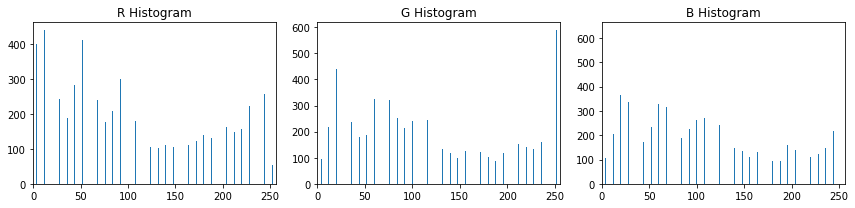

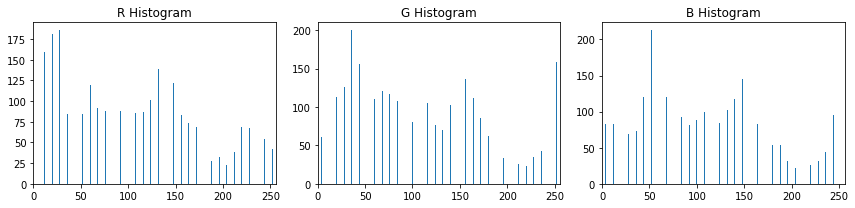

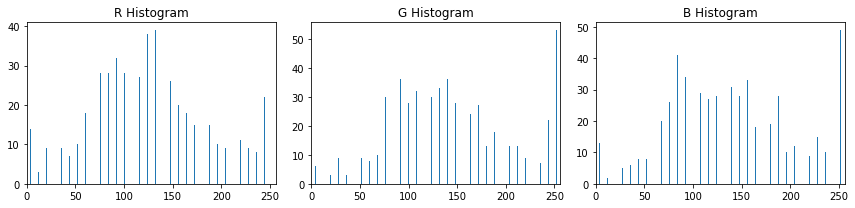

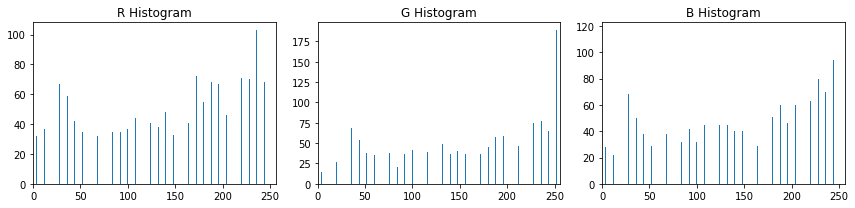

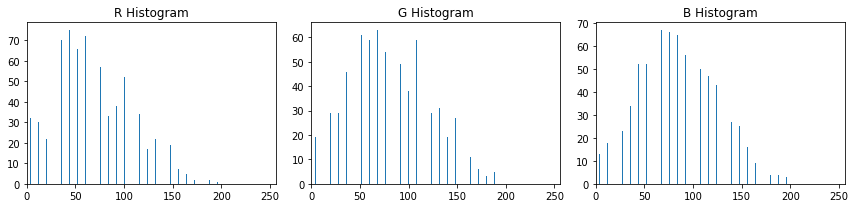

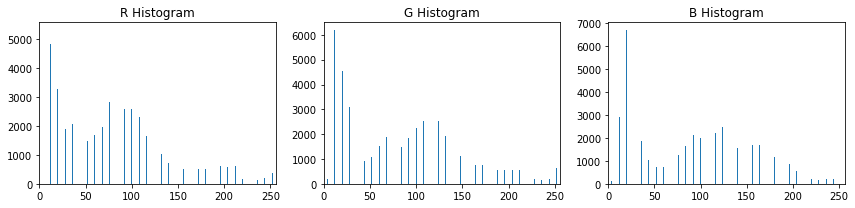

In [5]:

for image in cutout_images:
    rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))
    if rh is not None:
        plot_rgb_histogram(rh, gh, bh, bincen)
    else:
        print('Your function is returning None for at least one variable...')

In [6]:
# Define a function to compute color histogram features  
def color_hist2(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

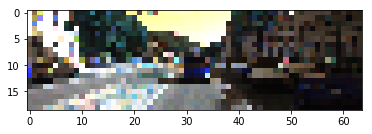

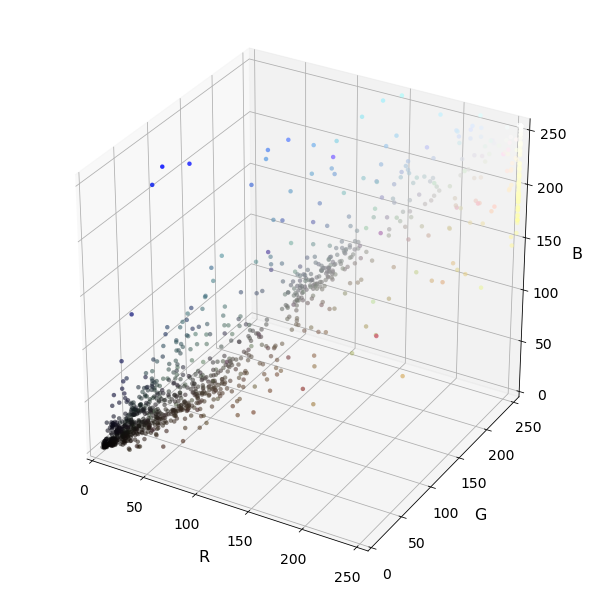

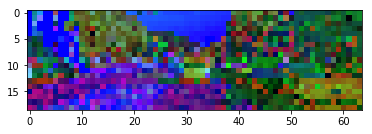

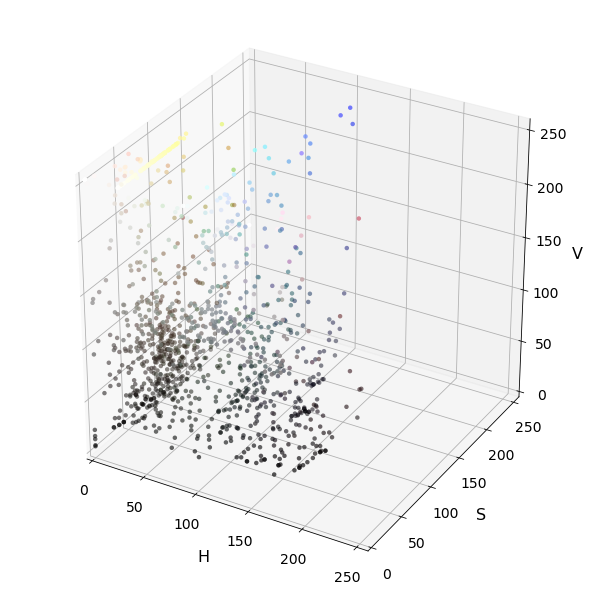

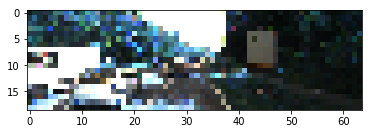

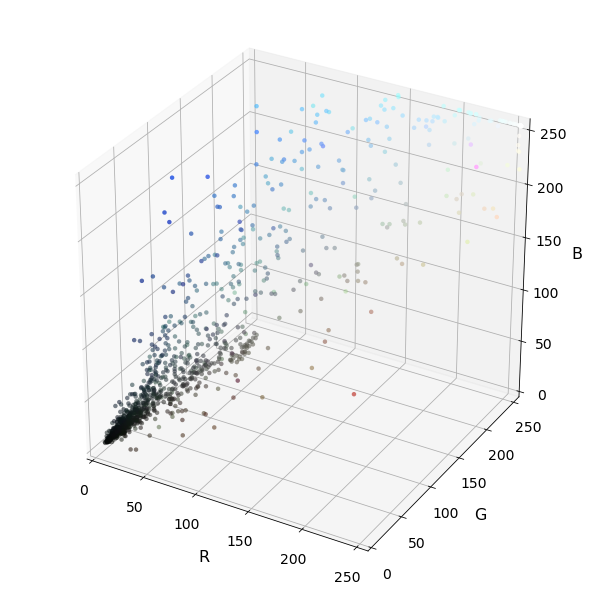

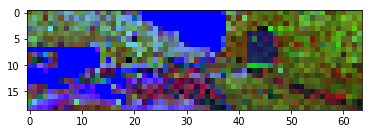

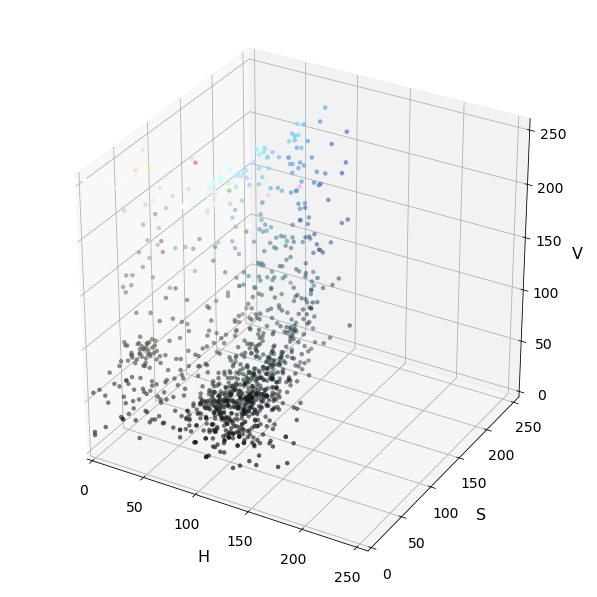

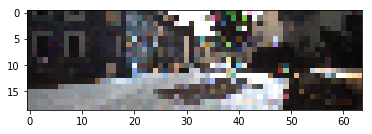

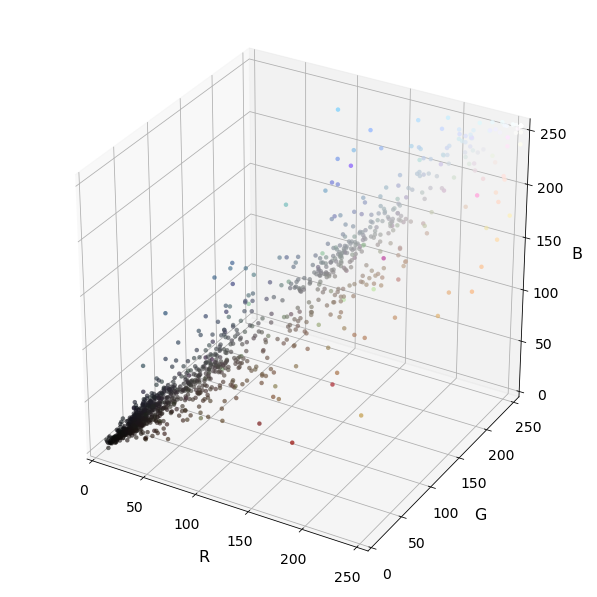

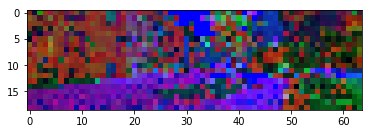

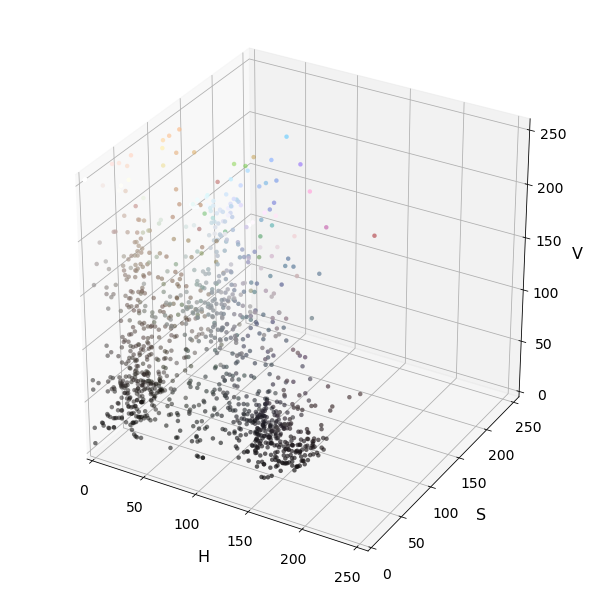

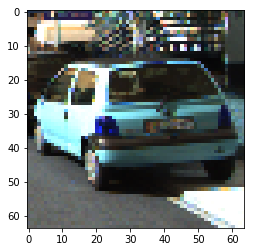

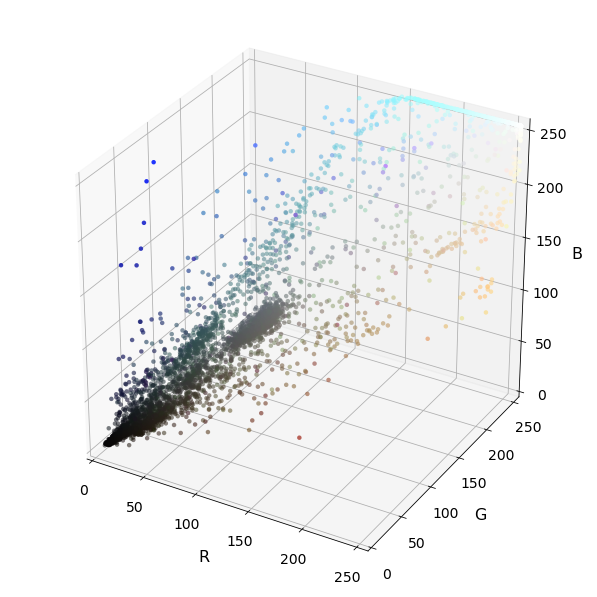

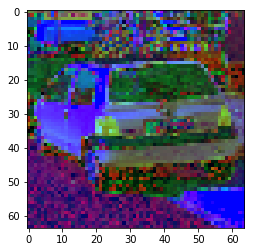

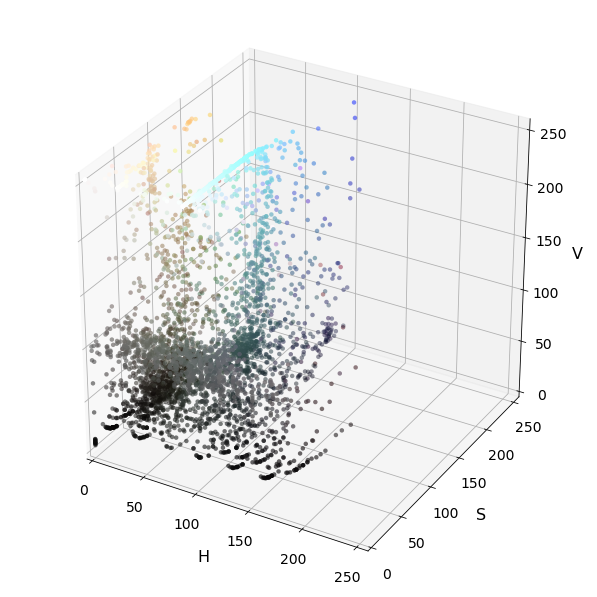

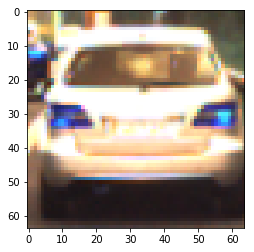

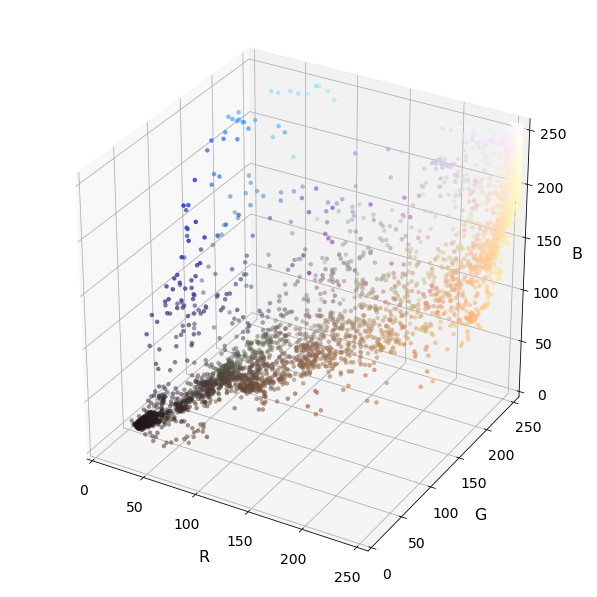

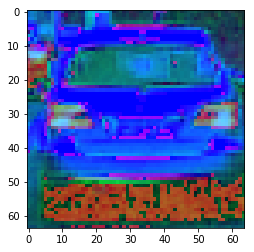

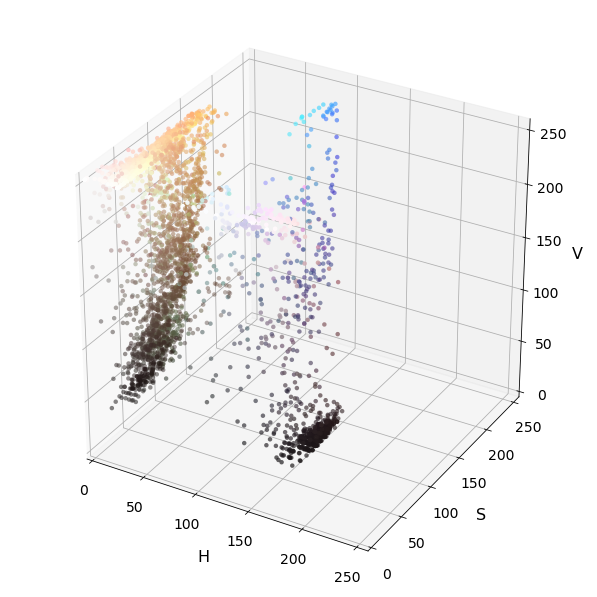

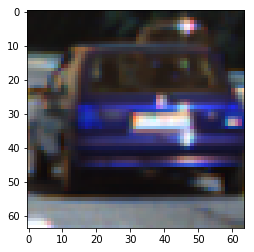

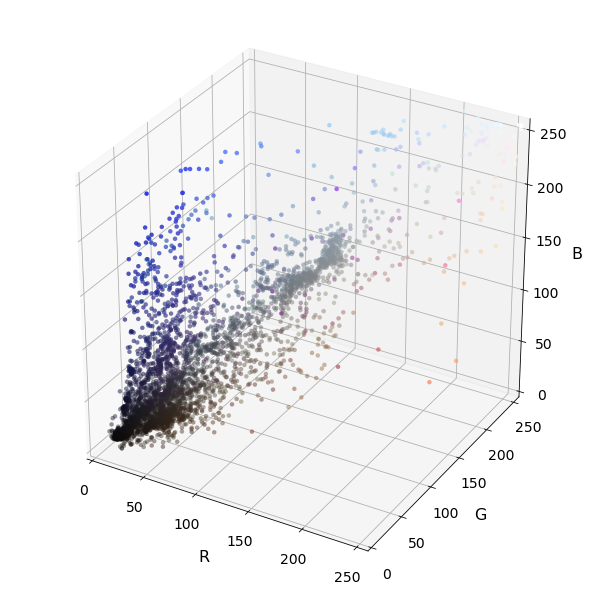

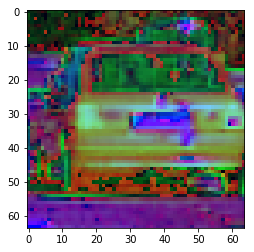

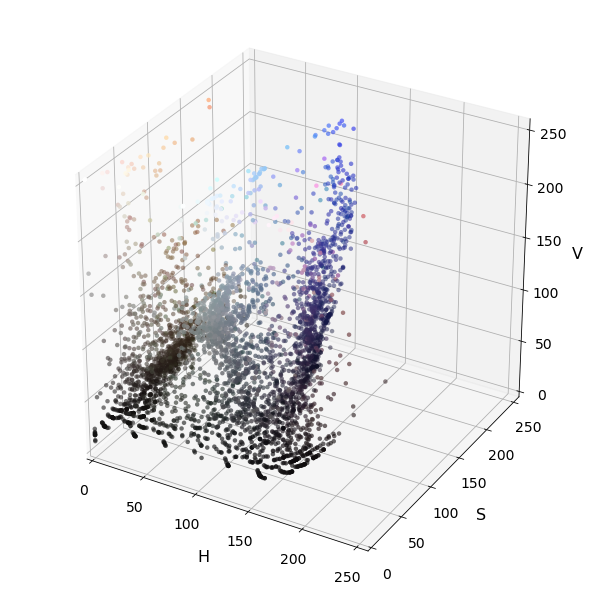

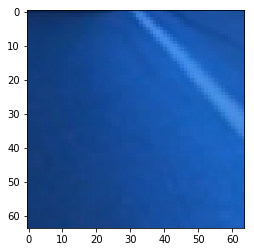

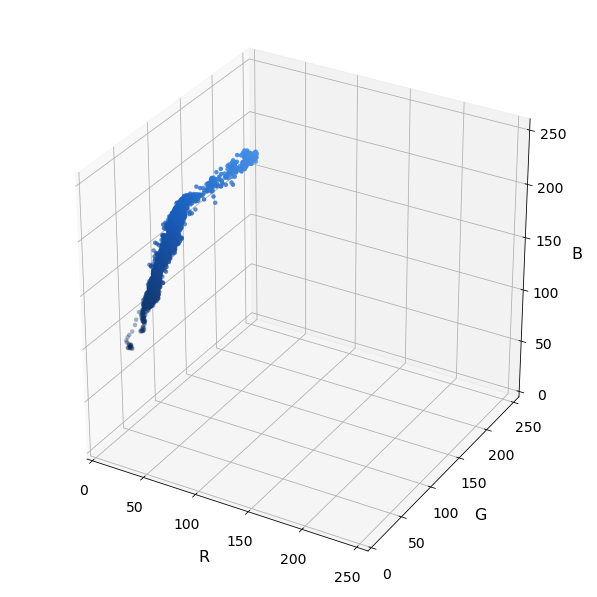

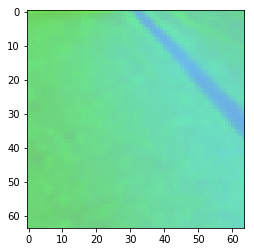

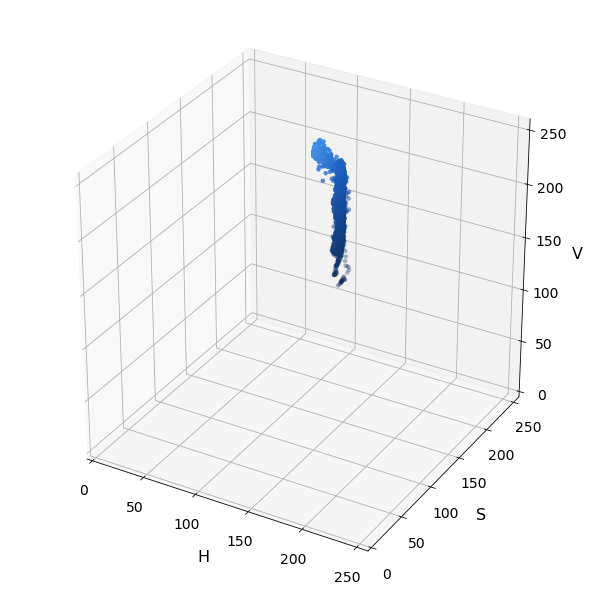

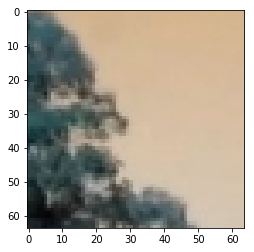

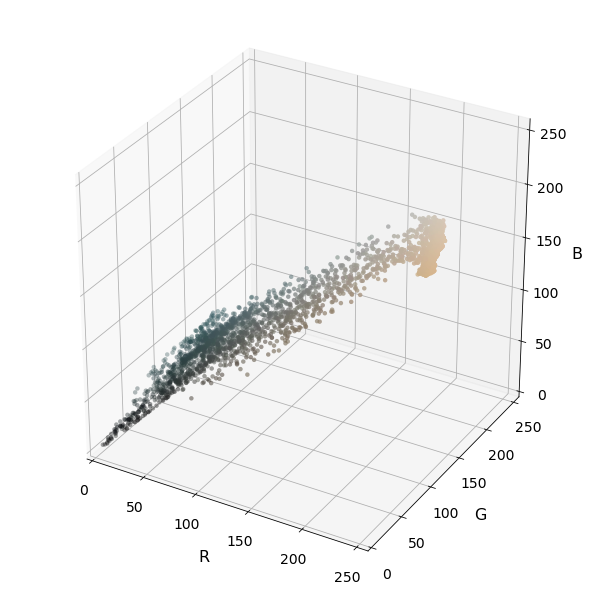

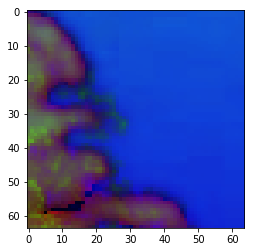

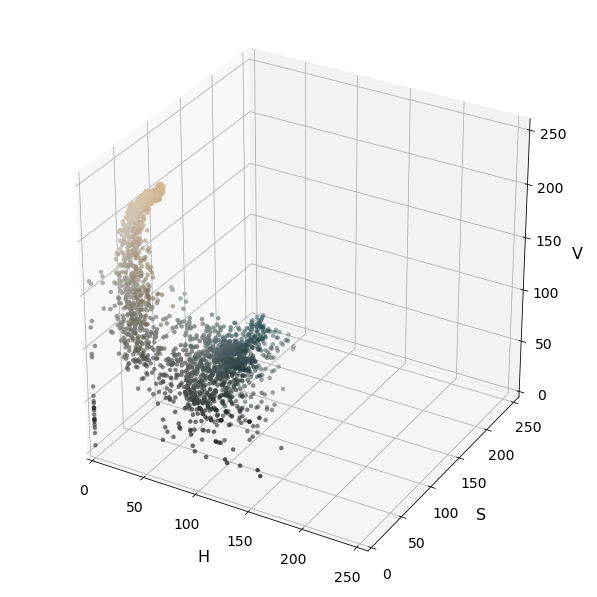

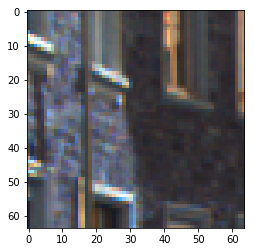

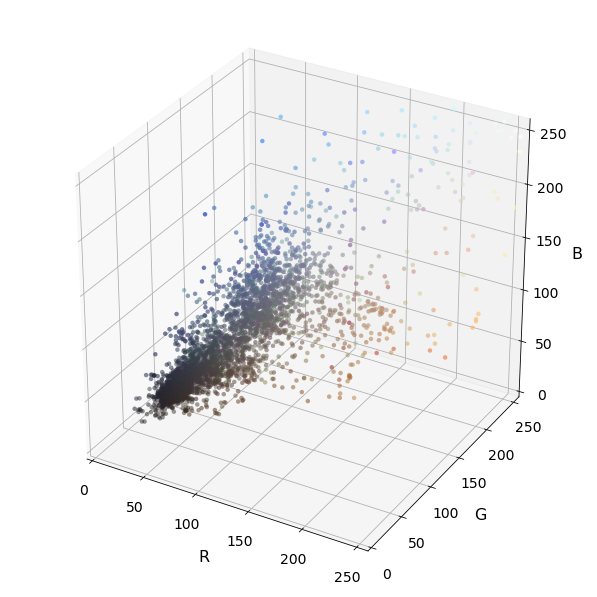

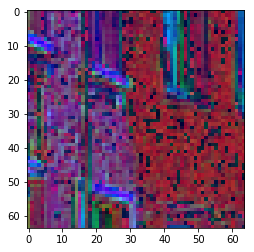

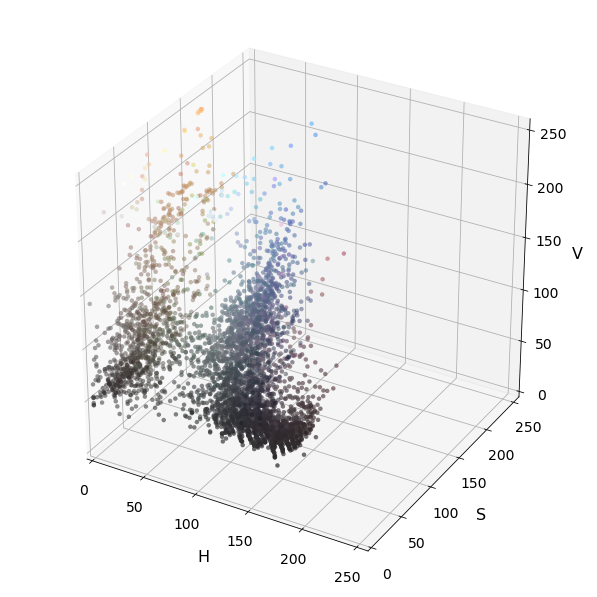

In [7]:
for img in color_space_images:
    scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
    img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)
    # Convert subsampled image to desired color space(s)
    img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
    img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
    img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting
    plt.imshow(img_small_RGB)
    plt.show()
    # Plot and show
    plot3d(img_small_RGB, img_small_rgb)
    plt.show()

    plt.imshow(img_small_HSV)
    plt.show()
    plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
    plt.show()
    

In [8]:
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    return features

In [9]:
# Define a function to compute binned color features  
def bin_spatial2(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

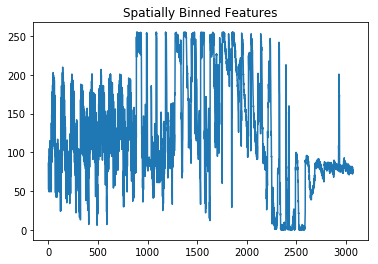

In [10]:
for image in spatial_images:
    feature_vec = bin_spatial(image, color_space='RGB', size=(32, 32))
    # Plot features
    plt.plot(feature_vec)
    plt.title('Spatially Binned Features')
    plt.show()

In [11]:
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict

Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


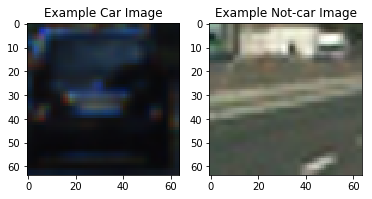

In [12]:
data_info = data_look(vehicle_images, non_vehicle_images)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(vehicle_images))
notcar_ind = np.random.randint(0, len(non_vehicle_images))
    
# Read in car / not-car images
car_image = mpimg.imread(vehicle_images[car_ind])
notcar_image = mpimg.imread(non_vehicle_images[notcar_ind])


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car Image')
plt.show()

In [13]:
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        return features

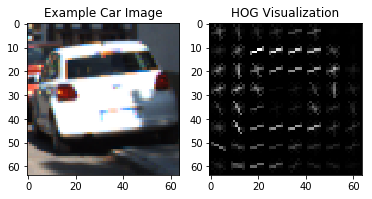

In [14]:
# Generate a random index to look at a car image
ind = np.random.randint(0, len(vehicle_images))
# Read in the image
image = mpimg.imread(vehicle_images[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')
plt.show()


In [49]:
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256)):
      # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        #image = bgr_to_rgb(cv2.imread(file))
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        else: feature_image = np.copy(image)      
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial2(feature_image, size=spatial_size)
        # Apply color_hist() also with a color space option now
        hist_features = color_hist2(feature_image, nbins=hist_bins, bins_range=hist_range)
        # Append the new feature vector to the features list
        features.append(np.concatenate((spatial_features, hist_features)))
    return features

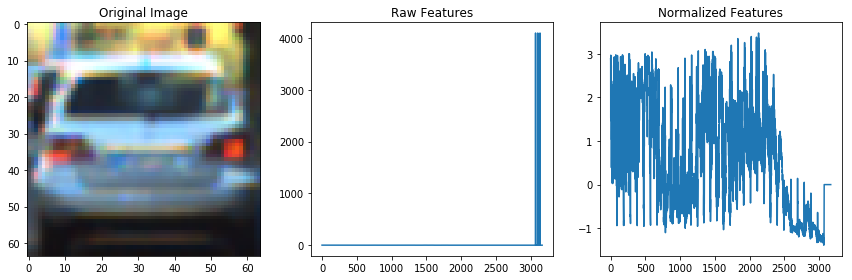

In [51]:
cars = []
non_cars = []

for x in range(0, 1000):
    ind = np.random.randint(0, len(vehicle_images))
    cars.append(vehicle_images[ind])
    non_cars.append(non_vehicle_images[ind])

car_features = extract_features(cars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))
notcar_features = extract_features(non_cars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))

if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
    plt.show()
else: 
    print('Your function only returns empty feature vectors...')